Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [8]:
NAME = "Athithian Selvadurai"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

### Option 2 - Using Yahoo Finance `yfinance` library

In [9]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%***********************]  1 of 1 completed


In [10]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed


In [11]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  2 of 2 completed


In [12]:
## TYPE YOUE CODE BELOW

**Will be using the yfinance library**

In [13]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

**Multiple Stocks in one dataframe!**

2. (2 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use .csv files provided. This will not affect your grade for the assignment.

In [14]:
all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
end_date = datetime.date(datetime.now())
five_years_prior = end_date + relativedelta(months=-60)
all_stocks = yf.download(all_stocks_list, start = five_years_prior)
adj_close_data = all_stocks["Adj Close"]


[*********************100%***********************]  4 of 4 completed


In [15]:
adj_close_data.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-27,531.409973,94.169998,127.988770,129.109100
2015-07-28,526.030029,95.290001,128.777283,131.192734
2015-07-29,529.000000,96.989998,129.614075,131.487961
2015-07-30,536.760010,95.209999,129.509445,131.592163
2015-07-31,536.150024,94.010002,130.338211,131.392426


3. (3 points) Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

In [16]:
adj_close_end_bm = adj_close_data.resample("BM").mean()
adj_close_end_bm.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-31,531.870007,95.134000,129.245557,130.954877
2015-08-31,518.464765,91.778572,123.790472,127.358272
2015-09-30,520.955718,91.446191,117.932376,122.950425
2015-10-30,566.743181,97.129545,118.541037,131.663867
2015-11-30,657.695499,105.968999,112.143736,138.511726


4. (3 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

Are they autocorrelated?
Provide short explanation.

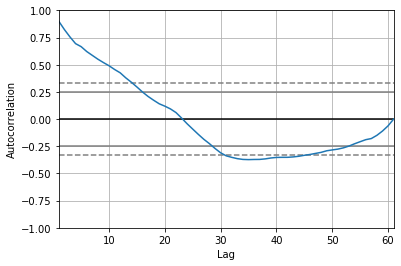

In [17]:
autocorrelation_plot(adj_close_end_bm["AMZN"])

It is correlated to time because we see there are many points of the plot outside the 95% CI lines.

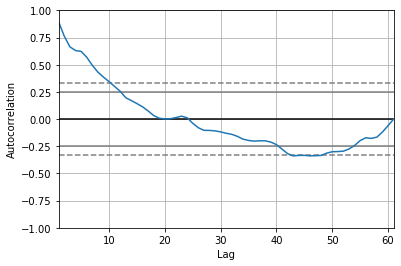

In [18]:
autocorrelation_plot(adj_close_end_bm["FB"])

Similar to the AMZN stock, the FB stock also shows similar large swings albeit with a bit of shakiness, but it also seems to be correlated to time because of the amount of points outside the 95% CI lines.

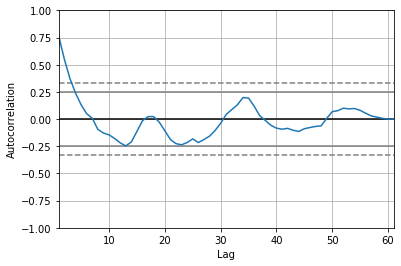

In [19]:
autocorrelation_plot(adj_close_end_bm["IBM"])

Seeing as the IBM stock stays within the 95% CI lines for the majority of the plot, it does not seem that this stock is correlated to time.

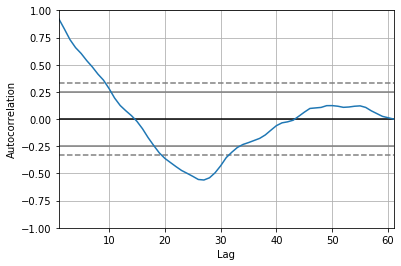

In [20]:
autocorrelation_plot(adj_close_end_bm["MMM"])

The MMM stock has some of the largest swings, so it is also correlated to time. In addition there is a majority of the plot outside the 95% CI lines.

5. (4 points) Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function. Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns. Are the returns autocorrelated? Provide short explanation.

In [21]:
monthly_returns = adj_close_end_bm/adj_close_end_bm.shift(1)-1
monthly_returns.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-31,NaN,NaN,NaN,NaN
2015-08-31,-0.025204,-0.035271,-0.042207,-0.027464
2015-09-30,0.004804,-0.003622,-0.047323,-0.034610
2015-10-30,0.087891,0.062150,0.005161,0.070870
2015-11-30,0.160482,0.091007,-0.053967,0.052010


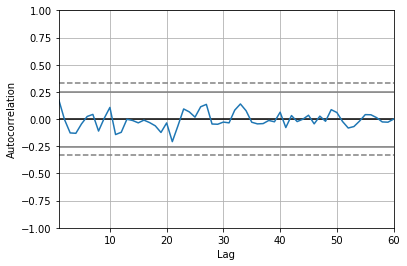

In [23]:
autocorrelation_plot(monthly_returns_drop["AMZN"])

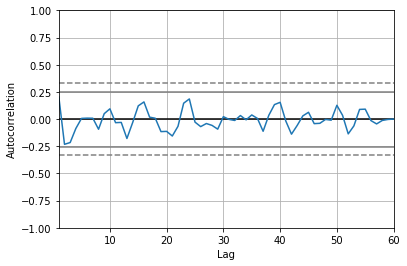

In [24]:
autocorrelation_plot(monthly_returns_drop["FB"])

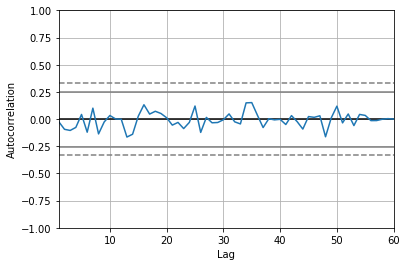

In [25]:
autocorrelation_plot(monthly_returns_drop["IBM"])

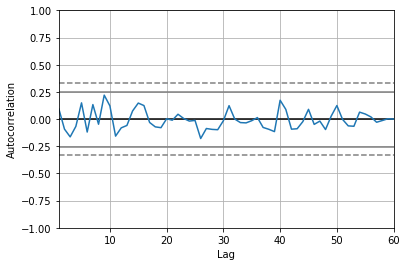

In [26]:
autocorrelation_plot(monthly_returns_drop["MMM"])

All of our plots for the 4 stocks do NOT show any signifanct trends and are well within the CI intervals, so none of the stock price returns are affected by time (which makes sense since stock returns would be affected by events not long amounts of time)

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

In [27]:
monthly_returns_drop.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-08-31,-0.025204,-0.035271,-0.042207,-0.027464
2015-09-30,0.004804,-0.003622,-0.047323,-0.034610
2015-10-30,0.087891,0.062150,0.005161,0.070870
2015-11-30,0.160482,0.091007,-0.053967,0.052010
2015-12-31,0.017587,-0.005605,0.007411,-0.028241


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101D2D30>,
      dtype=object)

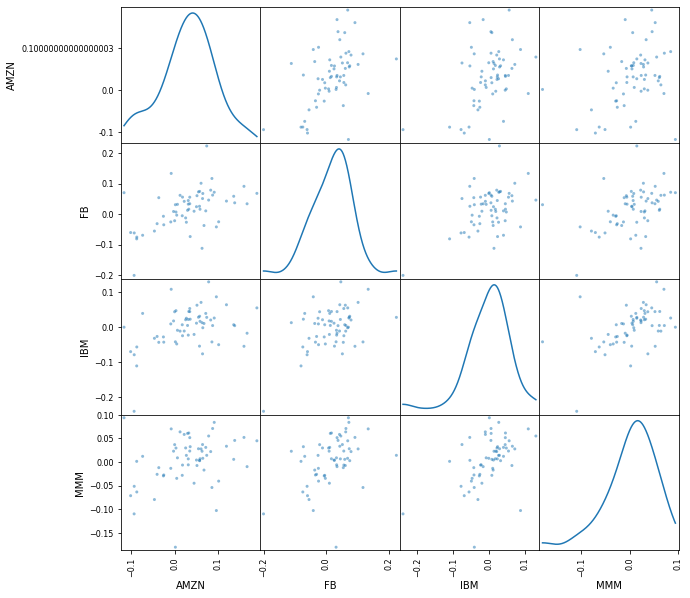

In [28]:
scatter_matrix(monthly_returns_drop, diagonal = 'kde', figsize =(10,10))

Yes there does seem to be a common correlation in that all the stocks show positive correlation to only slightly varying strengths. 